In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bigbasket-entire-product-list-28k-datapoints/BigBasket Products.csv


<h1>About Dataset</h1> 

<p align="center">
  <img src="https://images.unsplash.com/photo-1445205170230-053b83016050?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1171&q=80" />
</p>

**E-commerce (electronic commerce) is the activity of electronically buying or selling of products on online services or over the Internet. E-commerce draws on technologies such as mobile commerce, electronic funds transfer, supply chain management, Internet marketing, online transaction processing, electronic data interchange (EDI), inventory management systems, and automated data collection systems. E-commerce is in turn driven by the technological advances of the semiconductor industry, and is the largest sector of the electronics industry. 
Bigbasket is the largest online grocery supermarket in India. Was launched somewhere around in 2011 since then they've been expanding their business. Though some new competitors have been able to set their foot in the nation such as Blinkit etc. but BigBasket has still not loose anything - thanks to ever expanding popular base and their shift to online buying.**

# Table Of Contents

**[Import Necessary Libararies](#1)**

**[Load Dataset](#2)**

**[Explore Dataset](#3)**

**[Getting Idea of Nulls](#4)**

**[Data Preprocessing](#5)**

**[Taking Care of Nulls](#6)**

**[EDA](#7)**

**[Moving towards Sub Category](#12)**








<a id="1"></a> <br>
# Import Necessary Libararies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.io as pio

<a id="2"></a> <br>
# Load Dataset

In [3]:
df = pd.read_csv('../input/bigbasket-entire-product-list-28k-datapoints/BigBasket Products.csv', index_col=0)

<a id="3"></a> <br>
# Explore Dataset

In [4]:
df.head(10)

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
6,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.0,199.0,Disinfectant Spray & Cleaners,3.3,Stay protected from contamination with Multipu...
7,Multani Mati,Beauty & Hygiene,Skin Care,Satinance,58.0,58.0,Face Care,3.6,Satinance multani matti is an excellent skin t...
8,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.0,250.0,Hand Wash & Sanitizers,4.0,70%Alcohol based is gentle of hand leaves skin...
9,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.0,1098.0,Shampoo & Conditioner,3.5,"An exclusive blend with Vitamin B7 Biotin, Hyd..."


In [5]:
df.sample(10)

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
7096,"Basmati Rice/Basmati Akki - Traditional, Authe...","Foodgrains, Oil & Masala",Rice & Rice Products,Kohinoor,174.00,215.0,Basmati Rice,4.1,"Cultivated in the foothills of Himalayas, Kohi..."
11856,Floor Cleaner - pH Neutral (Cleans all Surface...,Cleaning & Household,All Purpose Cleaners,Frosch,299.00,299.0,Floor & Other Cleaners,4.3,"Its a natural, very efficient, and thus enviro..."
20769,Cream Sen 50 g + Wax Sen Full Body 20s,Beauty & Hygiene,Feminine Hygiene,Veet,250.15,327.0,Hair Removal,NaN,Veet Hair Removal Cream is your answer to a sm...
17829,Colgate Slim Soft Charcoal Toothbrush,Beauty & Hygiene,Oral Care,Colgate,127.00,150.0,Toothbrush,4.3,"Colgate Slim Soft Charcoal Toothbrush, with 17..."
9299,Multigrain Balls - Chilli Chataka,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",GoodDiet,70.00,95.0,"Healthy, Baked Snacks",NaN,"Sit back and enjoy a completely baked, non-fri..."
19383,Hazelnut Hot Brew Bags,Gourmet & World Food,Drinks & Beverages,Sleepy Owl,255.00,300.0,Coffee & Pre-Mix,NaN,1. The hazelnut flavour hot brew coffee bags g...
5595,Burnt Garlic Cashews,"Foodgrains, Oil & Masala",Dry Fruits,FabBox,392.00,392.0,Cashews,NaN,A lot of people approached us saying they wish...
14732,3 Minute Breakfast - Poha,Snacks & Branded Foods,Ready To Cook & Eat,MTR,60.00,60.0,Breakfast & Snack Mixes,4.1,"MTR Poha is a wholesome & tasty breakfast, rea..."
23330,White Pepper Powder,"Foodgrains, Oil & Masala",Masalas & Spices,Eastern,77.42,81.5,Powdered Spices,4.1,White pepper is less aromatic than black peppe...


<a id="4"></a> <br>
# Getting Idea of Nulls

<AxesSubplot:ylabel='index'>

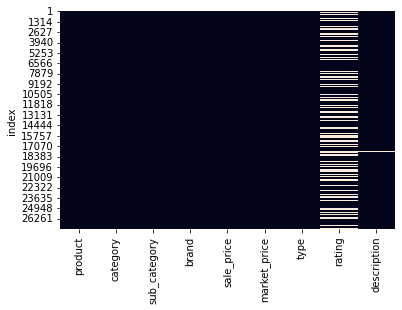

In [6]:
# Plot to see null values in our data
sns.heatmap(df.isnull(), cbar=False)

In [7]:
# Null Value Percentage Per column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
product,product,0.003629
category,category,0.000000
sub_category,sub_category,0.000000
brand,brand,0.003629
sale_price,sale_price,0.000000
market_price,market_price,0.000000
type,type,0.000000
rating,rating,31.304663
description,description,0.417347


<a id="5"></a> <br>
# Data Preprocessing 

**The best possible way to deal with Nulls in rating is that we take mean rating of each catagory and then fill Null ratings in accordance with the catagory they belong to. For instance for Nulls in snaks catagory we will fill it with mean rating of snanks.**

In [8]:
# Print all unique catagories present in Dataset
for elem in df['category'].unique():
    print(elem)

Beauty & Hygiene
Kitchen, Garden & Pets
Cleaning & Household
Gourmet & World Food
Foodgrains, Oil & Masala
Snacks & Branded Foods
Beverages
Bakery, Cakes & Dairy
Baby Care
Fruits & Vegetables
Eggs, Meat & Fish


In [9]:
# Print all unique sub_category present in Dataset
for elem in df['sub_category'].unique():
    print(elem)

Hair Care
Storage & Accessories
Pooja Needs
Bins & Bathroom Ware
Bath & Hand Wash
All Purpose Cleaners
Skin Care
Mops, Brushes & Scrubs
Cooking & Baking Needs
Chocolates & Biscuits
Fresheners & Repellents
Snacks, Dry Fruits, Nuts
Dairy & Cheese
Pasta, Soup & Noodles
Dry Fruits
Drinks & Beverages
Kitchen Accessories
Flask & Casserole
Breakfast Cereals
Frozen Veggies & Snacks
Fruit Juices & Drinks
Cookies, Rusk & Khari
Fragrances & Deos
Tea
Masalas & Spices
Men's Grooming
Chocolates & Candies
Steel Utensils
Tinned & Processed Food
Organic Staples
Sauces, Spreads & Dips
Pickles & Chutney
Ready To Cook & Eat
Baby Bath & Hygiene
Stationery
Pet Food & Accessories
Biscuits & Cookies
Oral Care
Snacks & Namkeen
Detergents & Dishwash
Crockery & Cutlery
Cuts & Sprouts
Health & Medicine
Cookware & Non Stick
Dairy
Feminine Hygiene
Diapers & Wipes
Edible Oils & Ghee
Baby Food & Formula
Fresh Fruits
Fresh Vegetables
Herbs & Seasonings
Breads & Buns
Oils & Vinegar
Feeding & Nursing
Energy & Soft Drink

In [10]:
# Print all unique item types present in Dataset
for elem in df['type'].unique():
    print(elem)

Hair Oil & Serum
Water & Fridge Bottles
Lamp & Lamp Oil
Laundry, Storage Baskets
Bathing Bars & Soaps
Disinfectant Spray & Cleaners
Face Care
Hand Wash & Sanitizers
Shampoo & Conditioner
Utensil Scrub-Pad, Glove
Flours & Pre-Mixes
Luxury Chocolates, Gifts
Floor & Other Cleaners
Mosquito Repellent
Soap Cases & Dispensers
Aromatherapy
Roasted Seeds & Nuts
Tofu
Tools & Accessories
Imported Noodles
Other Dry Fruits
Gourmet Tea & Tea Bags
Choppers & Graters
Casserole
Granola & Cereal Bars
Frozen Veg Snacks
Lip Care
Juices
Bakery Biscuits, Cookies
Men's Deodorants
Green Tea
Containers Sets
Whole Spices
Blended Masalas
Chocolates
Eau De Toilette
Cookies, Biscotti, Wafer
Steel Lunch Boxes
Olive, Jalapeno, Gherkin
Organic Rice, Other Rice
Shaving Care
Imported Cleaners
Thai & Asian Sauces
Chutney Powder
Cooking Pastes
Gourmet Juices & Drinks
Face & Body
Beans & Pulses
Papads, Ready To Fry
Hair & Scalp Treatment
Baby Health
Notebooks, Files, Folders
Kitchen Tools & Other Accessories
Pet Meals & 

<a id="6"></a> <br>
# Taking Care of Nulls

In [11]:
df['rating'].fillna(df.groupby("category")['rating'].transform("mean"), inplace=True)

<AxesSubplot:ylabel='index'>

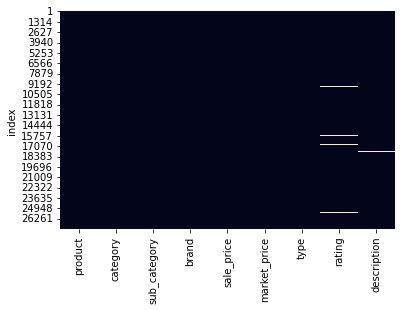

In [12]:
# Plot to see null values in our data
sns.heatmap(df.isnull(), cbar=False)

**We have managed to reduce Null values from 31 percent to 3 percent these 3 percent dont belong to any catagory.**

In [13]:
# Null Value Percentage Per column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
product,product,0.003629
category,category,0.000000
sub_category,sub_category,0.000000
brand,brand,0.003629
sale_price,sale_price,0.000000
market_price,market_price,0.000000
type,type,0.000000
rating,rating,3.291599
description,description,0.417347


In [14]:
# AVG Rating, Sale Price & market_price Per catagory
data = df
AVG_DF = data[['category','rating', 'market_price', 'sale_price']].groupby(['category']).mean().reset_index().sort_values('rating', ascending = False)

In [15]:
AVG_DF

,category,rating,market_price,sale_price
3,Beverages,4.084858,272.233898,239.758949
6,"Foodgrains, Oil & Masala",4.062198,230.131913,193.167500
0,Baby Care,4.023790,596.754098,534.946180
8,Gourmet & World Food,3.984410,358.420885,319.854011
10,Snacks & Branded Foods,3.983313,140.775231,129.593134
4,Cleaning & Household,3.956667,262.112280,226.173118
2,Beauty & Hygiene,3.930655,493.535302,418.679197
1,"Bakery, Cakes & Dairy",3.911128,157.881316,142.802750
9,"Kitchen, Garden & Pets",3.734715,659.657654,507.524615
5,"Eggs, Meat & Fish",NaN,325.835486,288.897486


<a id="7"></a> <br>
# EDA

In [16]:
df.head(5)

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


<a id="8"></a> <br>
## Ranking of Catagories WRT Rating

In [17]:
AVG_RATING_df = AVG_DF.head(9).sort_values('rating', ascending = False)

fig = px.bar(AVG_RATING_df, x='category', y='rating', template = 'plotly_dark', title='Ranking of Catagories WRT Rating', color='rating', height=800)
fig.update_xaxes(tickangle=90, rangeselector_font_size=8)
fig.show()

<a id="9"></a> <br>
## Ranking of Catagories WRT AVG Market Price

In [18]:
avg_market_price_df = AVG_DF.sort_values('market_price', ascending = True)

fig = px.bar(avg_market_price_df, x='market_price', y='category', template = 'plotly_dark', title='Ranking of Catagories WRT AVG Market Price', color='market_price', height=800)
fig.show()

<a id="10"></a> <br>
## Ranking of Catagories WRT AVG Sale Price

In [19]:
avg_sale_price_df = AVG_DF.sort_values('sale_price', ascending = True)

fig = px.bar(avg_sale_price_df, x='sale_price', y='category', template = 'plotly_dark', title='Ranking of Catagories WRT AVG Market Price', color='sale_price', height=800)
fig.show()

<a id="11"></a> <br>
## Scatter Plot of cross Market Price and Sale Price

In [20]:
fig = px.scatter(avg_sale_price_df, x="sale_price", y="market_price", color="sale_price",
                 size='sale_price', hover_data=['category', 'sale_price', 'market_price', 'rating'], template = 'plotly_dark', 
                 title='Scatter Plot of cross Market Price and Sale Price')
fig.show()

<a id="12"></a> <br>
# Moving towards Sub Category

In [21]:
df.head(5)

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [22]:
# AVG Rating, Sale Price & market_price Per Sub-catagory
data = df
AVG_SUB_DF = data[['sub_category','rating', 'market_price', 'sale_price']].groupby(['sub_category']).mean().reset_index().sort_values('rating', ascending = False)

In [23]:
AVG_SUB_DF.head(5)

,sub_category,rating,market_price,sale_price
27,Detergents & Dishwash,4.198365,312.685824,269.750536
89,Water,4.169698,155.882353,153.191176
5,Baby Food & Formula,4.166070,361.437500,358.315625
34,Energy & Soft Drinks,4.159161,160.729730,150.441982
10,Biscuits & Cookies,4.151911,76.678689,65.289410


<a id="13"></a> <br>
## Scatter Plot of cross Market Price and Sale Price Per Sub Category

In [24]:
fig = px.scatter(AVG_SUB_DF, x="sale_price", y="market_price", color="sale_price",
                 size='sale_price', hover_data=['sub_category', 'sale_price', 'market_price', 'rating'], template = 'plotly_dark', 
                 title='Scatter Plot of cross Market Price and Sale Price Per Sub Category')
fig.show()

![](https://images.unsplash.com/photo-1617575521317-d2974f3b56d2?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1074&q=80)